<center><h2>ToAI - Class C - Final Project:</h2></center>
<center><h1>Loan Default Prediction (part of SEB Big Data Challenge)</h1></center>

<img src="./assets/toai.png" style="width: 20rem; background: black;"/>
<img src="./assets/lfma-nariai-seb-bankas.jpg" style="width: 20rem"/>

## Table of contents:
0. [Prerquisites;](#prerequisites)
1. [Acquisition;](#acquisition)
2. [Exploration & Preprocessing;](#exploration-preprocessing)
3. [Analysis;](#analysis)
4. [Interpretation;](#interpretation)

<br>

## <a id="prerequisites">1. Prerequisites:</a>

In [5]:
# Download tools:

!rm -rf ./cornelia
!git clone -b cornelia https://github.com/augustinasn/_data_science_projects.git ./cornelia
!rm -rf ./cornelia/.git

Cloning into './cornelia'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 144 (delta 40), reused 88 (delta 8), pack-reused 0
Receiving objects: 100% (144/144), 47.82 MiB | 16.59 MiB/s, done.
Resolving deltas: 100% (40/40), done.


In [1]:
# Packages:

from cornelia.imports import *
from cornelia.helpers import display_opts
from cornelia.extraction import read_feather, pickle_obj, unpickle_obj
from cornelia.preprocessing import match_cols, drop_cols, fill_NAs, one_hot_encode, category_encode, split_df, drop_NAs
from cornelia.visualization import print_missing_data, print_descriptive_stats, print_categories, plot_data, print_df, plot_distributions, pretty_print_dict
from cornelia.analysis import score_regr, score_class, feature_importance, confidence, similiar_features, score_with_cols_dropped, pdps

from sklearn.ensemble import RandomForestClassifier

import json
import itertools
import datetime

# Options:

%matplotlib inline
%load_ext autoreload
%autoreload 2

display_opts(decimal_numbers=2,
             max_rows=1000,
             max_cols=30)

## <a id="acquisition">1. Acquisition</a>

In [7]:
# Load raw data:

raw_train_df = read_feather(filename="raw_df_with_additional_features.f")
raw_test_df = read_feather(filename="test_df.f")

,id,y,amount_current_loan,term,credit_score,loan_purpose,yearly_income,home_ownership,bankruptcies,years_current_job,monthly_debt,years_credit_history,months_since_last_delinquent,open_accounts,credit_problems,credit_balance,max_open_credit
0,1000001,1,387574,short,None,debt_consolidation,nan,mortgage,1.00,10.00,20090.79,12,nan,10,1,242649,440440.00
1,1000002,0,72512,short,good,debt_consolidation,190798.00,rent,0.00,2.00,1460.91,6,nan,3,0,55062,129998.00
2,1000003,0,217404,short,good,debt_consolidation,1220313.00,mortgage,0.00,8.00,18293.39,10,nan,19,0,467514,513568.00
3,1000004,0,99999999,long,good,debt_consolidation,1435545.00,own,0.00,0.00,14312.70,18,27.00,7,0,157814,184140.00
4,1000005,1,215974,short,good,debt_consolidation,679250.00,rent,0.00,3.00,16464.45,14,53.00,6,0,216125,257840.00


,id,amount_current_loan,term,credit_score,loan_purpose,yearly_income,home_ownership,bankruptcies,years_current_job,monthly_debt,years_credit_history,months_since_last_delinquent,open_accounts,credit_problems,credit_balance,max_open_credit
0,1,438812,short,fair,debt_consolidation,1421010.00,mortgage,0.00,10.00,28595.95,21,nan,11,0,599545,826034
1,2,278344,long,None,debt_consolidation,723216.00,mortgage,0.00,0.00,15784.63,16,nan,9,0,271225,449504
2,3,155716,short,very_good,home_improvements,1956316.00,mortgage,0.00,8.00,21586.85,27,nan,12,0,28709,314468
3,4,442992,long,good,debt_consolidation,1339177.00,mortgage,0.00,10.00,23030.28,17,nan,7,0,766878,982234
4,5,412346,long,None,debt_consolidation,nan,mortgage,0.00,6.00,24058.94,10,68.00,11,0,524001,620950


## <a id="exploration-preprocessing">2. Exploration and Preprocessing:</a>

In [8]:
# Match columns:

raw_train_df = match_cols(df1=raw_train_df,
                          df2=raw_test_df,
                          omit=["y"])

No columns removed.


,id,amount_current_loan,term,credit_score,loan_purpose,yearly_income,home_ownership,bankruptcies,years_current_job,monthly_debt,years_credit_history,months_since_last_delinquent,open_accounts,credit_problems,credit_balance,max_open_credit,y
0,1000001,387574,short,None,debt_consolidation,nan,mortgage,1.00,10.00,20090.79,12,nan,10,1,242649,440440.00,1
1,1000002,72512,short,good,debt_consolidation,190798.00,rent,0.00,2.00,1460.91,6,nan,3,0,55062,129998.00,0
2,1000003,217404,short,good,debt_consolidation,1220313.00,mortgage,0.00,8.00,18293.39,10,nan,19,0,467514,513568.00,0
3,1000004,99999999,long,good,debt_consolidation,1435545.00,own,0.00,0.00,14312.70,18,27.00,7,0,157814,184140.00,0
4,1000005,215974,short,good,debt_consolidation,679250.00,rent,0.00,3.00,16464.45,14,53.00,6,0,216125,257840.00,1


In [9]:
# Observe missing data:

print_missing_data(dfs=[raw_train_df, raw_test_df],
                   labels=["train", "test"])

,Missing values in train (%),Missing values in test (%)
feature_name,,
id,0.00,0.00
amount_current_loan,0.00,0.00
term,0.00,0.00
credit_score,22.93,23.88
loan_purpose,0.00,0.00
yearly_income,18.89,19.47
home_ownership,0.00,0.00
bankruptcies,0.18,0.17
years_current_job,4.18,3.53


In [10]:
# Descriptive stats:

print_descriptive_stats(dfs=[raw_train_df, raw_test_df],
                        labels=["train", "test"])

,count,mean,std,min,25%,50%,75%,max
amount_current_loan (test),10000.00,11794868.60,31829206.38,21472.00,178238.50,310695.00,523094.00,99999999.00
amount_current_loan (train),9000000.00,13038047.72,33267502.46,10802.00,180268.00,316360.00,536184.00,99999999.00
bankruptcies (test),9983.00,0.12,0.35,0.00,0.00,0.00,0.00,5.00
bankruptcies (train),8983451.00,0.12,0.35,0.00,0.00,0.00,0.00,7.00
credit_balance (test),10000.00,292058.10,348668.55,0.00,111824.50,206824.50,362615.00,7225415.00
credit_balance (train),9000000.00,297664.97,376019.74,0.00,113278.00,210786.00,370804.00,32878968.00
credit_problems (test),10000.00,0.17,0.47,0.00,0.00,0.00,0.00,9.00
credit_problems (train),9000000.00,0.17,0.49,0.00,0.00,0.00,0.00,15.00
id (test),10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
id (train),9000000.00,5500000.50,2598076.36,1000001.00,3250000.75,5500000.50,7750000.25,10000000.00


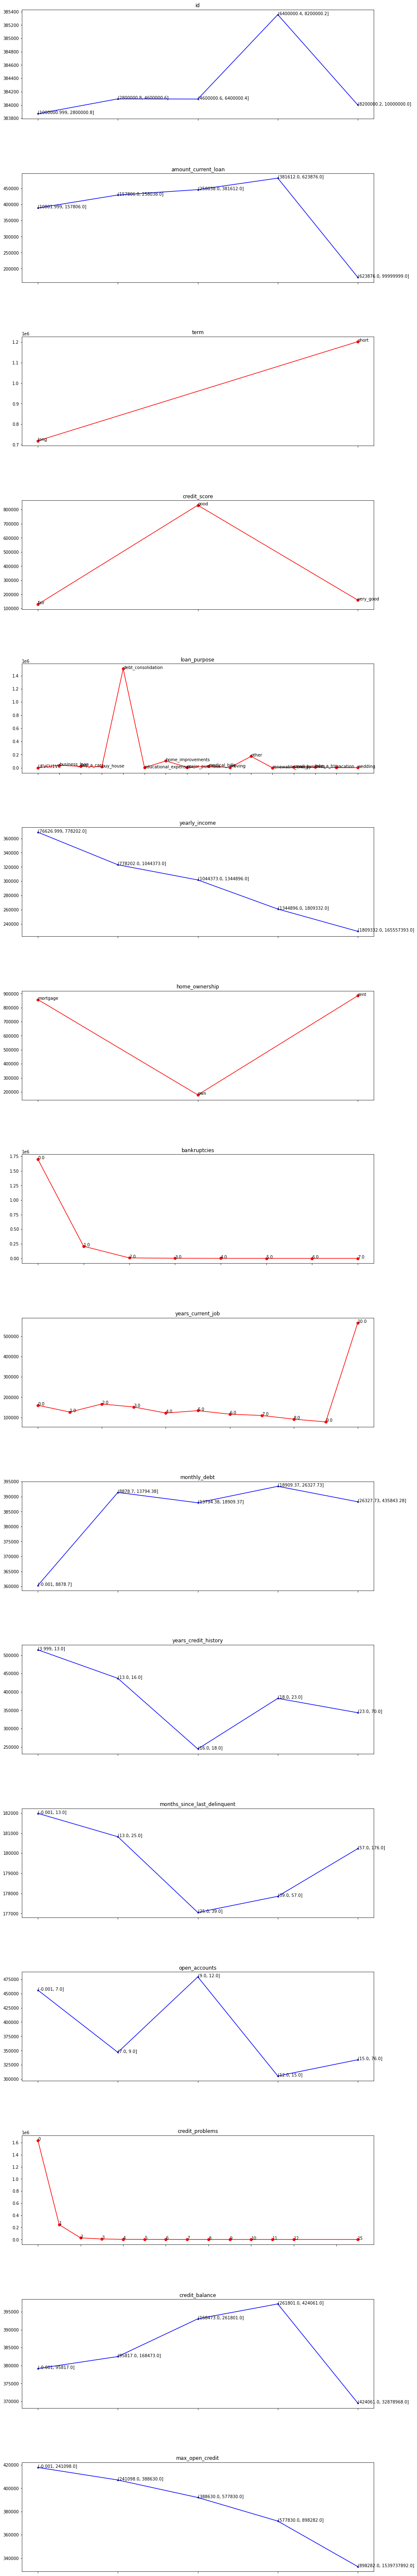

In [11]:
# Distributions

plot_distributions(raw_train_df, "y", n_bins=5)

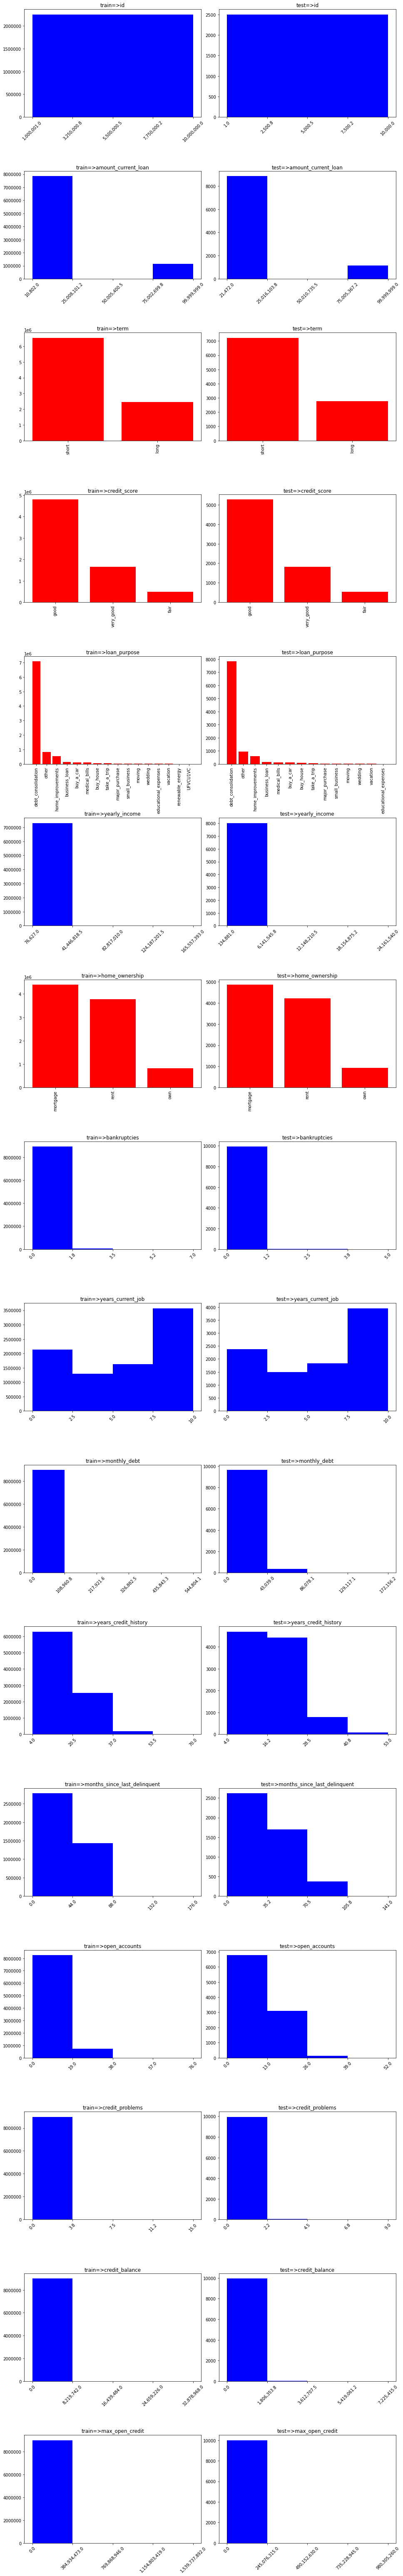

In [12]:
# Print histograms for each feature:
    
plot_data(dfs=[raw_train_df, raw_test_df],
          labels=["train", "test"],
          bench=1,
          n_bins=4)

In [15]:
# Drop a single row with an obfuscated feature:

raw_train_df = raw_train_df[raw_train_df["loan_purpose"] != "UFVCU1VC"]

In [14]:
# Backup data:

pickle_obj([raw_train_df, raw_test_df], "train_test_dfs")

Object saved @ ./tmp/train_test_dfs.pkl


## <a id="analysis">3. Analysis & Interpretation:</a>

In [5]:
# Unbackup data:

raw_train_df, raw_test_df = unpickle_obj("train_test_dfs")

### 3.1. Iteration #1 - test dropping NaNs on each axis:

In [6]:
config_1 = {"sample": 0.1,
            "nas": {"mode": "drop",
                    "params": {"axis": [0, 1]}},
            "categoricals": {"mode": "category_encode"},
            "split": 0.5,
            "prediction": {"model": "rf",
                           "params": {"n_estimators": 20,
                                      "max_samples": 50_000}
                           }
           }

p = Pipeline(config=config_1, 
             train_df=raw_train_df,
             test_df=raw_test_df,
             target="y")

p.clear_score()
p.run()


Sub-iteration 1/2:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: drop;
		 # axis: 0;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 20;
		 # max_samples - 50000;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),0.89,0.84
Precision (What proportion of positive identifications was actually correct?),0.99,0.49
Recall (What proportion of actual positives was identified correctly?),0.89,0.76
F1,0.94,0.59
ROC AUC,0.98,0.69



Sub-iteration 2/2:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: drop;
		 # axis: 1;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 20;
		 # max_samples - 50000;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),0.80,0.78
Precision (What proportion of positive identifications was actually correct?),0.78,0.36
Recall (What proportion of actual positives was identified correctly?),0.80,0.63
F1,0.79,0.46
ROC AUC,0.81,0.63


### 3.2. Iteration #2 - test filling NaNs with different parameters:

In [7]:
config_2 = {"sample": 0.1,
            "nas": {"mode": "fill",
                    "params": {"num_method": ["median", "mean", None],
                               "cat_method": ["mode", None],
                               "was_missing": [True, False]}},
            "categoricals": {"mode": "category_encode"},
            "split": 0.5,
            "prediction": {"model": "rf",
                           "params": {"n_estimators": 20,
                                      "max_samples": 50_000}
                           }
           }

p = Pipeline(config=config_2, 
             train_df=raw_train_df,
             test_df=raw_test_df,
             target="y")

p.run()


Sub-iteration 1/12:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 20;
		 # max_samples - 50000;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),0.84,0.83
Precision (What proportion of positive identifications was actually correct?),0.94,0.86
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.89,0.85
ROC AUC,0.87,0.74



Sub-iteration 2/12:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: False;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 20;
		 # max_samples - 50000;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),0.81,0.78
Precision (What proportion of positive identifications was actually correct?),0.80,0.45
Recall (What proportion of actual positives was identified correctly?),0.81,0.68
F1,0.80,0.54
ROC AUC,0.84,0.68



Sub-iteration 3/12:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: None;
		 # was_missing: True;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 20;
		 # max_samples - 50000;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),0.84,0.83
Precision (What proportion of positive identifications was actually correct?),0.94,0.87
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.89,0.85
ROC AUC,0.87,0.74



Sub-iteration 4/12:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: None;
		 # was_missing: False;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 20;
		 # max_samples - 50000;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),0.84,0.83
Precision (What proportion of positive identifications was actually correct?),0.93,0.84
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.89,0.83
ROC AUC,0.87,0.75



Sub-iteration 5/12:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: mean;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 20;
		 # max_samples - 50000;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),0.84,0.83
Precision (What proportion of positive identifications was actually correct?),0.94,0.86
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.89,0.85
ROC AUC,0.87,0.74



Sub-iteration 6/12:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: mean;
		 # cat_method: mode;
		 # was_missing: False;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 20;
		 # max_samples - 50000;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),0.81,0.78
Precision (What proportion of positive identifications was actually correct?),0.80,0.45
Recall (What proportion of actual positives was identified correctly?),0.81,0.68
F1,0.80,0.54
ROC AUC,0.83,0.68



Sub-iteration 7/12:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: mean;
		 # cat_method: None;
		 # was_missing: True;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 20;
		 # max_samples - 50000;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),0.84,0.83
Precision (What proportion of positive identifications was actually correct?),0.94,0.87
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.89,0.85
ROC AUC,0.87,0.74



Sub-iteration 8/12:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: mean;
		 # cat_method: None;
		 # was_missing: False;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 20;
		 # max_samples - 50000;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),0.84,0.82
Precision (What proportion of positive identifications was actually correct?),0.93,0.83
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.89,0.83
ROC AUC,0.87,0.75



Sub-iteration 9/12:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: None;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 20;
		 # max_samples - 50000;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),0.84,0.83
Precision (What proportion of positive identifications was actually correct?),0.94,0.86
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.89,0.85
ROC AUC,0.87,0.74



Sub-iteration 10/12:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: None;
		 # cat_method: mode;
		 # was_missing: False;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 20;
		 # max_samples - 50000;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),0.81,0.78
Precision (What proportion of positive identifications was actually correct?),0.81,0.44
Recall (What proportion of actual positives was identified correctly?),0.81,0.68
F1,0.81,0.54
ROC AUC,0.84,0.68



Sub-iteration 11/12:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: None;
		 # cat_method: None;
		 # was_missing: True;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 20;
		 # max_samples - 50000;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),0.84,0.83
Precision (What proportion of positive identifications was actually correct?),0.94,0.87
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.89,0.85
ROC AUC,0.87,0.74



Sub-iteration 12/12:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: None;
		 # cat_method: None;
		 # was_missing: False;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 20;
		 # max_samples - 50000;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),0.84,0.82
Precision (What proportion of positive identifications was actually correct?),0.94,0.85
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.89,0.84
ROC AUC,0.87,0.75


### 3.3. Iteration #3 - testing OneHotEncoding & feature importance:

In [23]:
config_3 = {"sample": 0.1,
            "nas": {"mode": "fill",
                    "params": {"num_method": "median",
                               "cat_method": "mode",
                               "was_missing": True}},
            "categoricals": {"mode": "one_hot_encode",
                             "params": {"card_threshold": 15}},
            "split": 0.5,
            "prediction": {"model": "rf",
                           "params": {"n_estimators": 20,
                                      "max_samples": 50_000}
                           }
           }

p = Pipeline(config=config_3, 
             train_df=raw_train_df,
             test_df=raw_test_df,
             target="y")

p.run()


Sub-iteration 1/1:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 20;
		 # max_samples - 50000;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),0.84,0.83
Precision (What proportion of positive identifications was actually correct?),0.94,0.86
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.89,0.84
ROC AUC,0.87,0.74


In [24]:
# Feature importance:

fi_cols_to_drop, fi_cols_to_keep = p.feature_importance(to_keep_threshold=0.01)

# Backup feature importance result:

pickle_obj(fi_cols_to_drop, "iteration_3_fi_cols_to_drop")

,feature_name,importance
0,amount_current_loan,0.12
1,yearly_income,0.09
2,monthly_debt,0.09
3,max_open_credit,0.09
4,credit_balance,0.09
5,id,0.09
6,credit_score=>was_missing,0.08
7,years_credit_history,0.07
8,open_accounts,0.06
9,months_since_last_delinquent,0.05


Object saved @ ./tmp/iteration_3_fi_cols_to_drop.pkl


### 3.4. Iteration #4 - dropping unimportant features + testing colinear features:

In [31]:
fi_cols_to_drop = unpickle_obj("iteration_3_fi_cols_to_drop")

config_4 = {"sample": 0.1,
            "nas": {"mode": "fill",
                    "params": {"num_method": "median",
                               "cat_method": "mode",
                               "was_missing": True}},
            "categoricals": {"mode": "one_hot_encode",
                             "params": {"card_threshold": 15}},
            "drop_cols": [fi_cols_to_drop],
            "split": 0.5,
            "prediction": {"model": "rf",
                           "params": {"n_estimators": 20,
                                      "max_samples": 50_000}
                           }
           }

p = Pipeline(config=config_4, 
             train_df=raw_train_df,
             test_df=raw_test_df,
             target="y")

p.run()


Sub-iteration 1/1:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>moving_OHE;
		 # loan_pu

,Train,Valid
Jacquard Score (%),0.84,0.82
Precision (What proportion of positive identifications was actually correct?),0.95,0.88
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.90,0.86
ROC AUC,0.86,0.72


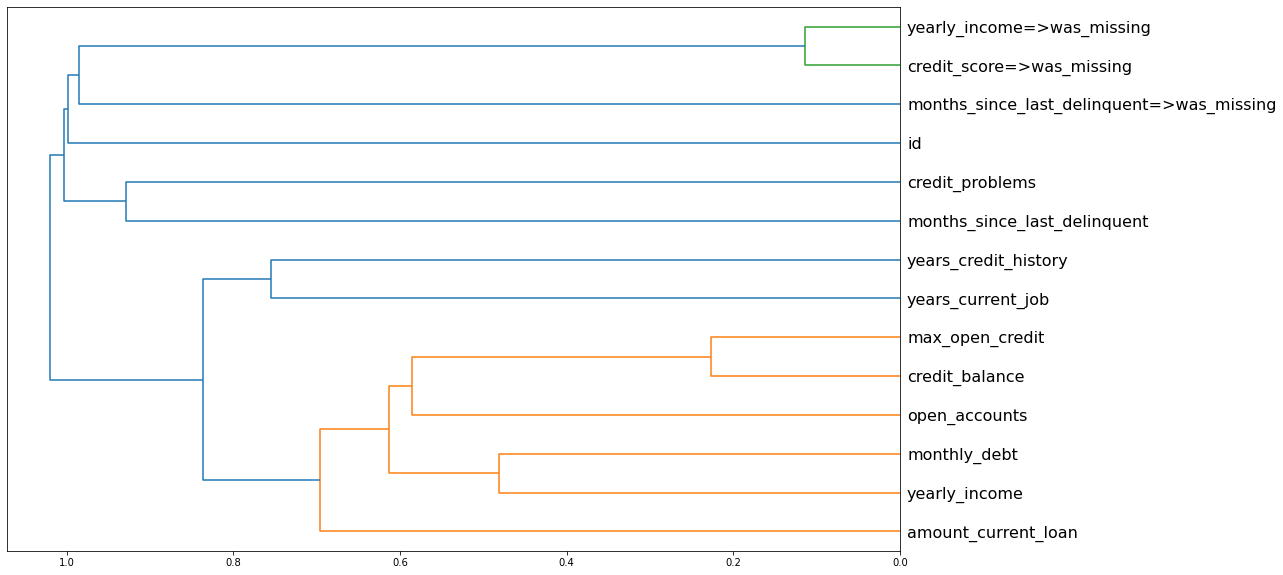

In [32]:
# Find colinear features via additive tree:

p.colinear_features()

In [35]:
# Check if dropping any of colinear feature will impact score:

potentially_colinear_features = [["yearly_income=>was_missing", "credit_score=>was_missing"],
                                 ["max_open_credit", "credit_balance"],
                                 ["monthly_debt", "yearly_income"]]

# Backup feature importance result:

pickle_obj(potentially_colinear_features, "iteration_4_potentially_colinear_features")

Object saved @ ./tmp/iteration_4_potentially_colinear_features.pkl


### 3.5. Iteration #5 - test dropping different combinations of colinear features:

In [6]:
fi_cols_to_drop = unpickle_obj("iteration_3_fi_cols_to_drop")
potentially_colinear_features = unpickle_obj("iteration_4_potentially_colinear_features")
feature_pairs_drop = list(itertools.product(*[t + [None] for t in potentially_colinear_features]))
feature_pairs_drop = [[j for j in list(i) if j is not None] + fi_cols_to_drop for i in feature_pairs_drop]

config_5 = {"sample": 0.1,
            "nas": {"mode": "fill",
                    "params": {"num_method": "median",
                               "cat_method": "mode",
                               "was_missing": True}},
            "categoricals": {"mode": "one_hot_encode",
                             "params": {"card_threshold": 15}},
            "drop_cols": feature_pairs_drop,
            "split": 0.5,
            "prediction": {"model": "rf",
                           "params": {"n_estimators": 20,
                                      "max_samples": 50_000}
                           }
           }

p = Pipeline(config=config_5, 
             train_df=raw_train_df,
             test_df=raw_test_df,
             target="y")

p.run()


Sub-iteration 1/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # yearly_income=>was_missing;
		 # max_open_credit;
		 # monthly_debt;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;


,Train,Valid
Jacquard Score (%),0.83,0.82
Precision (What proportion of positive identifications was actually correct?),0.95,0.89
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.90,0.86
ROC AUC,0.86,0.71



Sub-iteration 2/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # yearly_income=>was_missing;
		 # max_open_credit;
		 # yearly_income;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;

,Train,Valid
Jacquard Score (%),0.81,0.78
Precision (What proportion of positive identifications was actually correct?),0.76,0.45
Recall (What proportion of actual positives was identified correctly?),0.80,0.69
F1,0.78,0.54
ROC AUC,0.83,0.67



Sub-iteration 3/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # yearly_income=>was_missing;
		 # max_open_credit;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>

,Train,Valid
Jacquard Score (%),0.84,0.83
Precision (What proportion of positive identifications was actually correct?),0.96,0.89
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.90,0.86
ROC AUC,0.86,0.71



Sub-iteration 4/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # yearly_income=>was_missing;
		 # credit_balance;
		 # monthly_debt;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
	

,Train,Valid
Jacquard Score (%),0.84,0.82
Precision (What proportion of positive identifications was actually correct?),0.95,0.89
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.90,0.86
ROC AUC,0.86,0.71



Sub-iteration 5/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # yearly_income=>was_missing;
		 # credit_balance;
		 # yearly_income;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;


,Train,Valid
Jacquard Score (%),0.81,0.78
Precision (What proportion of positive identifications was actually correct?),0.75,0.46
Recall (What proportion of actual positives was identified correctly?),0.80,0.69
F1,0.78,0.55
ROC AUC,0.83,0.67



Sub-iteration 6/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # yearly_income=>was_missing;
		 # credit_balance;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>w

,Train,Valid
Jacquard Score (%),0.84,0.82
Precision (What proportion of positive identifications was actually correct?),0.95,0.87
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.90,0.85
ROC AUC,0.86,0.72



Sub-iteration 7/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # yearly_income=>was_missing;
		 # monthly_debt;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was

,Train,Valid
Jacquard Score (%),0.84,0.82
Precision (What proportion of positive identifications was actually correct?),0.95,0.87
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.89,0.85
ROC AUC,0.86,0.71



Sub-iteration 8/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # yearly_income=>was_missing;
		 # yearly_income;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>wa

,Train,Valid
Jacquard Score (%),0.81,0.78
Precision (What proportion of positive identifications was actually correct?),0.76,0.47
Recall (What proportion of actual positives was identified correctly?),0.80,0.70
F1,0.78,0.56
ROC AUC,0.83,0.67



Sub-iteration 9/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # yearly_income=>was_missing;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan

,Train,Valid
Jacquard Score (%),0.83,0.82
Precision (What proportion of positive identifications was actually correct?),0.95,0.87
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.90,0.85
ROC AUC,0.86,0.72



Sub-iteration 10/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # credit_score=>was_missing;
		 # max_open_credit;
		 # monthly_debt;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;


,Train,Valid
Jacquard Score (%),0.80,0.78
Precision (What proportion of positive identifications was actually correct?),0.80,0.36
Recall (What proportion of actual positives was identified correctly?),0.80,0.63
F1,0.80,0.46
ROC AUC,0.82,0.63



Sub-iteration 11/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # credit_score=>was_missing;
		 # max_open_credit;
		 # yearly_income;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;

,Train,Valid
Jacquard Score (%),0.80,0.78
Precision (What proportion of positive identifications was actually correct?),0.81,0.32
Recall (What proportion of actual positives was identified correctly?),0.80,0.60
F1,0.81,0.42
ROC AUC,0.81,0.61



Sub-iteration 12/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # credit_score=>was_missing;
		 # max_open_credit;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>

,Train,Valid
Jacquard Score (%),0.80,0.78
Precision (What proportion of positive identifications was actually correct?),0.80,0.37
Recall (What proportion of actual positives was identified correctly?),0.80,0.64
F1,0.80,0.47
ROC AUC,0.82,0.64



Sub-iteration 13/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # credit_score=>was_missing;
		 # credit_balance;
		 # monthly_debt;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
	

,Train,Valid
Jacquard Score (%),0.80,0.78
Precision (What proportion of positive identifications was actually correct?),0.79,0.36
Recall (What proportion of actual positives was identified correctly?),0.80,0.63
F1,0.79,0.46
ROC AUC,0.82,0.64



Sub-iteration 14/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # credit_score=>was_missing;
		 # credit_balance;
		 # yearly_income;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;


,Train,Valid
Jacquard Score (%),0.80,0.78
Precision (What proportion of positive identifications was actually correct?),0.81,0.34
Recall (What proportion of actual positives was identified correctly?),0.80,0.62
F1,0.80,0.44
ROC AUC,0.81,0.61



Sub-iteration 15/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # credit_score=>was_missing;
		 # credit_balance;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>w

,Train,Valid
Jacquard Score (%),0.80,0.78
Precision (What proportion of positive identifications was actually correct?),0.80,0.39
Recall (What proportion of actual positives was identified correctly?),0.80,0.65
F1,0.80,0.48
ROC AUC,0.82,0.64



Sub-iteration 16/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # credit_score=>was_missing;
		 # monthly_debt;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was

,Train,Valid
Jacquard Score (%),0.80,0.78
Precision (What proportion of positive identifications was actually correct?),0.80,0.37
Recall (What proportion of actual positives was identified correctly?),0.80,0.64
F1,0.80,0.47
ROC AUC,0.82,0.64



Sub-iteration 17/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # credit_score=>was_missing;
		 # yearly_income;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>wa

,Train,Valid
Jacquard Score (%),0.80,0.78
Precision (What proportion of positive identifications was actually correct?),0.82,0.34
Recall (What proportion of actual positives was identified correctly?),0.80,0.62
F1,0.81,0.44
ROC AUC,0.81,0.62



Sub-iteration 18/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # credit_score=>was_missing;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan

,Train,Valid
Jacquard Score (%),0.80,0.78
Precision (What proportion of positive identifications was actually correct?),0.81,0.39
Recall (What proportion of actual positives was identified correctly?),0.80,0.65
F1,0.81,0.49
ROC AUC,0.82,0.64



Sub-iteration 19/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # max_open_credit;
		 # monthly_debt;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;


,Train,Valid
Jacquard Score (%),0.83,0.82
Precision (What proportion of positive identifications was actually correct?),0.95,0.89
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.90,0.86
ROC AUC,0.86,0.71



Sub-iteration 20/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # max_open_credit;
		 # yearly_income;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;

,Train,Valid
Jacquard Score (%),0.83,0.82
Precision (What proportion of positive identifications was actually correct?),0.97,0.92
Recall (What proportion of actual positives was identified correctly?),0.85,0.84
F1,0.90,0.87
ROC AUC,0.85,0.69



Sub-iteration 21/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # max_open_credit;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>

,Train,Valid
Jacquard Score (%),0.83,0.82
Precision (What proportion of positive identifications was actually correct?),0.95,0.89
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.90,0.86
ROC AUC,0.86,0.71



Sub-iteration 22/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # credit_balance;
		 # monthly_debt;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
	

,Train,Valid
Jacquard Score (%),0.83,0.82
Precision (What proportion of positive identifications was actually correct?),0.95,0.89
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.90,0.86
ROC AUC,0.86,0.71



Sub-iteration 23/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # credit_balance;
		 # yearly_income;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;


,Train,Valid
Jacquard Score (%),0.83,0.83
Precision (What proportion of positive identifications was actually correct?),0.96,0.91
Recall (What proportion of actual positives was identified correctly?),0.85,0.84
F1,0.90,0.87
ROC AUC,0.85,0.69



Sub-iteration 24/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # credit_balance;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>m

,Train,Valid
Jacquard Score (%),0.84,0.82
Precision (What proportion of positive identifications was actually correct?),0.95,0.88
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.89,0.86
ROC AUC,0.86,0.72



Sub-iteration 25/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # monthly_debt;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>mov

,Train,Valid
Jacquard Score (%),0.83,0.82
Precision (What proportion of positive identifications was actually correct?),0.95,0.89
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.90,0.86
ROC AUC,0.86,0.71



Sub-iteration 26/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # yearly_income;
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>mo

,Train,Valid
Jacquard Score (%),0.83,0.82
Precision (What proportion of positive identifications was actually correct?),0.96,0.90
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.90,0.86
ROC AUC,0.86,0.69



Sub-iteration 27/27:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>moving_OHE;
		 # loan_

,Train,Valid
Jacquard Score (%),0.84,0.82
Precision (What proportion of positive identifications was actually correct?),0.95,0.88
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.90,0.86
ROC AUC,0.86,0.72


In [7]:
colinear_features = ["yearly_income=>was_missing", "max_open_credit", "monthly_debt"]
pickle_obj(colinear_features, "iteration_5_colinear_features")

Object saved @ ./tmp/iteration_5_colinear_features.pkl


### 3.6. Iteration #6 - dropping colinear features and testing different splits:

In [18]:
fi_cols_to_drop = unpickle_obj("iteration_3_fi_cols_to_drop")
colinear_features = unpickle_obj("iteration_5_colinear_features")

config_6 = {"sample": 0.1,
            "nas": {"mode": "fill",
                    "params": {"num_method": "median",
                               "cat_method": "mode",
                               "was_missing": True}},
            "categoricals": {"mode": "one_hot_encode",
                             "params": {"card_threshold": 15}},
            "drop_cols": [fi_cols_to_drop + colinear_features],
            "split": [0.5, 0.6, 0.7, 0.8, 0.9],
            "prediction": {"model": "rf",
                           "params": {"n_estimators": 20,
                                      "max_samples": 50_000}
                           }
           }

p = Pipeline(config=config_6, 
             train_df=raw_train_df,
             test_df=raw_test_df,
             target="y")

p.run()


Sub-iteration 1/5:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>moving_OHE;
		 # loan_pu

,Train,Valid
Jacquard Score (%),0.84,0.82
Precision (What proportion of positive identifications was actually correct?),0.95,0.88
Recall (What proportion of actual positives was identified correctly?),0.85,0.83
F1,0.90,0.85
ROC AUC,0.86,0.71



Sub-iteration 2/5:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>moving_OHE;
		 # loan_pu

,Train,Valid
Jacquard Score (%),0.83,0.82
Precision (What proportion of positive identifications was actually correct?),0.95,0.88
Recall (What proportion of actual positives was identified correctly?),0.84,0.83
F1,0.89,0.85
ROC AUC,0.84,0.71



Sub-iteration 3/5:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>moving_OHE;
		 # loan_pu

,Train,Valid
Jacquard Score (%),0.83,0.82
Precision (What proportion of positive identifications was actually correct?),0.94,0.89
Recall (What proportion of actual positives was identified correctly?),0.84,0.83
F1,0.89,0.86
ROC AUC,0.82,0.71



Sub-iteration 4/5:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>moving_OHE;
		 # loan_pu

,Train,Valid
Jacquard Score (%),0.83,0.82
Precision (What proportion of positive identifications was actually correct?),0.94,0.88
Recall (What proportion of actual positives was identified correctly?),0.84,0.83
F1,0.89,0.86
ROC AUC,0.81,0.70



Sub-iteration 5/5:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>moving_OHE;
		 # loan_pu

,Train,Valid
Jacquard Score (%),0.83,0.82
Precision (What proportion of positive identifications was actually correct?),0.93,0.88
Recall (What proportion of actual positives was identified correctly?),0.84,0.83
F1,0.88,0.85
ROC AUC,0.80,0.71


In [19]:
# Print score history:

p.scores(last_n=10)

,sample,nas_mode,nas_fill_num_method,nas_fill_cat_method,nas_fill_was_missing,nas_drop_axis,drop_cols,categoricals_mode,categoricals_one_hot_encode_card_thresh,split,prediction_model,prediction_rf_n_estimators,prediction_rf_max_samples,prediction_rf_max_features,prediction_rf_min_samples_leaf,Jacquard Score (%),Precision (What proportion of positive identifications was actually correct?),Recall (What proportion of actual positives was identified correctly?),F1,ROC AUC
54,0.10,fill,median,mode,True,0,"term=>short_OHE,loan_purpose=>debt_consolidation_OHE,bankruptcies,credit_score=>very_good_OHE,loan_purpose=>other_OHE,home_ownership=>rent_OHE,home_ownership=>mortgage_OHE,credit_score=>good_OHE,term=>long_OHE,home_ownership=>own_OHE,years_current_job=>was_missing,loan_purpose=>home_improvements_OHE,loan_purpose=>business_loan_OHE,credit_score=>fair_OHE,loan_purpose=>medical_bills_OHE,loan_purpose=>buy_a_car_OHE,loan_purpose=>buy_house_OHE,loan_purpose=>small_business_OHE,loan_purpose=>major_purchase_OHE,loan_purpose=>take_a_trip_OHE,bankruptcies=>was_missing,loan_purpose=>moving_OHE,loan_purpose=>vacation_OHE,loan_purpose=>wedding_OHE,loan_purpose=>educational_expenses_OHE,loan_purpose=>renewable_energy_OHE,max_open_credit=>was_missing,amount_current_loan=>was_missing,years_credit_history=>was_missing,open_accounts=>was_missing,credit_balance=>was_missing,home_ownership=>was_missing,id=>was_missing,term=>was_missing,loan_purpose=>was_missing,monthly_debt=>was_missing,credit_problems=>was_missing,yearly_income=>was_missing,max_open_credit,monthly_debt",one_hot_encode,15,0.50,rf,20,50000,auto,1,0.82,0.89,0.83,0.86,0.71
55,0.10,fill,median,mode,True,0,"term=>short_OHE,loan_purpose=>debt_consolidation_OHE,bankruptcies,credit_score=>very_good_OHE,loan_purpose=>other_OHE,home_ownership=>rent_OHE,home_ownership=>mortgage_OHE,credit_score=>good_OHE,term=>long_OHE,home_ownership=>own_OHE,years_current_job=>was_missing,loan_purpose=>home_improvements_OHE,loan_purpose=>business_loan_OHE,credit_score=>fair_OHE,loan_purpose=>medical_bills_OHE,loan_purpose=>buy_a_car_OHE,loan_purpose=>buy_house_OHE,loan_purpose=>small_business_OHE,loan_purpose=>major_purchase_OHE,loan_purpose=>take_a_trip_OHE,bankruptcies=>was_missing,loan_purpose=>moving_OHE,loan_purpose=>vacation_OHE,loan_purpose=>wedding_OHE,loan_purpose=>educational_expenses_OHE,loan_purpose=>renewable_energy_OHE,max_open_credit=>was_missing,amount_current_loan=>was_missing,years_credit_history=>was_missing,open_accounts=>was_missing,credit_balance=>was_missing,home_ownership=>was_missing,id=>was_missing,term=>was_missing,loan_purpose=>was_missing,monthly_debt=>was_missing,credit_problems=>was_missing,yearly_income=>was_missing,max_open_credit,monthly_debt",one_hot_encode,15,0.60,rf,20,50000,auto,1,0.82,0.89,0.83,0.86,0.71
56,0.10,fill,median,mode,True,0,"term=>short_OHE,loan_purpose=>debt_consolidation_OHE,bankruptcies,credit_score=>very_good_OHE,loan_purpose=>other_OHE,home_ownership=>rent_OHE,home_ownership=>mortgage_OHE,credit_score=>good_OHE,term=>long_OHE,home_ownership=>own_OHE,years_current_job=>was_missing,loan_purpose=>home_improvements_OHE,loan_purpose=>business_loan_OHE,credit_score=>fair_OHE,loan_purpose=>medical_bills_OHE,loan_purpose=>buy_a_car_OHE,loan_purpose=>buy_house_OHE,loan_purpose=>small_business_OHE,loan_purpose=>major_purchase_OHE,loan_purpose=>take_a_trip_OHE,bankruptcies=>was_missing,loan_purpose=>moving_OHE,loan_purpose=>vacation_OHE,loan_purpose=>wedding_OHE,loan_purpose=>educational_expenses_OHE,loan_purpose=>renewable_energy_OHE,max_open_credit=>was_missing,amount_current_loan=>was_missing,years_credit_history=>was_missing,open_accounts=>was_missing,credit_balance=>was_missing,home_ownership=>was_missing,id=>was_missing,term=>was_missing,loan_purpose=>was_missing,monthly_debt=>was_missing,credit_problems=>was_missing,yearly_income=>was_missing,max_open_credit,monthly_debt",one_hot_encode,15,0.70,rf,20,50000,auto,1,0.82,0.90,0.83,0.86,0.71
57,0.10,fill,median,

### 3.7. Iteration #7 - RandomForrest parameter tuning:

In [ ]:
fi_cols_to_drop = unpickle_obj("iteration_3_fi_cols_to_drop")
colinear_features = unpickle_obj("iteration_5_colinear_features")

config_7 = {"sample": 0.1,
            "nas": {"mode": "fill",
                    "params": {"num_method": "median",
                               "cat_method": "mode",
                               "was_missing": True}},
            "categoricals": {"mode": "one_hot_encode",
                             "params": {"card_threshold": 15}},
            "drop_cols": [fi_cols_to_drop + colinear_features],
            "split": 0.9,
            "prediction": {"model": "rf",
                           "params": {"n_estimators": [50, 75, 100, 125],
                                      "max_samples": [50_000, 100_000, 150_000],
                                      "max_features": [0.7, 0.8, 0.9],
                                      "min_samples_leaf": [1, 3, 5]}
                           }
           }

p = Pipeline(config=config_7, 
             train_df=raw_train_df,
             test_df=raw_test_df,
             target="y")

p.run()


Sub-iteration 1/108:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>moving_OHE;
		 # loan_

,Train,Valid
Jacquard Score (%),0.83,0.83
Precision (What proportion of positive identifications was actually correct?),0.98,0.96
Recall (What proportion of actual positives was identified correctly?),0.85,0.84
F1,0.91,0.90
ROC AUC,0.83,0.72



Sub-iteration 2/108:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>moving_OHE;
		 # loan_

,Train,Valid
Jacquard Score (%),0.83,0.82
Precision (What proportion of positive identifications was actually correct?),0.99,0.98
Recall (What proportion of actual positives was identified correctly?),0.85,0.84
F1,0.91,0.91
ROC AUC,0.81,0.72



Sub-iteration 3/108:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>moving_OHE;
		 # loan_

,Train,Valid
Jacquard Score (%),0.83,0.83
Precision (What proportion of positive identifications was actually correct?),0.99,0.99
Recall (What proportion of actual positives was identified correctly?),0.85,0.85
F1,0.91,0.91
ROC AUC,0.80,0.73



Sub-iteration 4/108:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>moving_OHE;
		 # loan_

,Train,Valid
Jacquard Score (%),0.83,0.83
Precision (What proportion of positive identifications was actually correct?),0.98,0.95
Recall (What proportion of actual positives was identified correctly?),0.85,0.84
F1,0.91,0.89
ROC AUC,0.83,0.72



Sub-iteration 5/108:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>moving_OHE;
		 # loan_

,Train,Valid
Jacquard Score (%),0.83,0.83
Precision (What proportion of positive identifications was actually correct?),0.99,0.98
Recall (What proportion of actual positives was identified correctly?),0.85,0.85
F1,0.91,0.91
ROC AUC,0.81,0.73



Sub-iteration 6/108:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>moving_OHE;
		 # loan_

,Train,Valid
Jacquard Score (%),0.83,0.83
Precision (What proportion of positive identifications was actually correct?),0.99,0.99
Recall (What proportion of actual positives was identified correctly?),0.85,0.85
F1,0.91,0.91
ROC AUC,0.80,0.73



Sub-iteration 7/108:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>moving_OHE;
		 # loan_

,Train,Valid
Jacquard Score (%),0.83,0.83
Precision (What proportion of positive identifications was actually correct?),0.97,0.95
Recall (What proportion of actual positives was identified correctly?),0.85,0.84
F1,0.91,0.89
ROC AUC,0.83,0.72



Sub-iteration 8/108:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>moving_OHE;
		 # loan_

,Train,Valid
Jacquard Score (%),0.83,0.83
Precision (What proportion of positive identifications was actually correct?),0.99,0.97
Recall (What proportion of actual positives was identified correctly?),0.85,0.84
F1,0.91,0.90
ROC AUC,0.81,0.72



Sub-iteration 9/108:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>moving_OHE;
		 # loan_

,Train,Valid
Jacquard Score (%),0.83,0.83
Precision (What proportion of positive identifications was actually correct?),1.00,0.99
Recall (What proportion of actual positives was identified correctly?),0.85,0.85
F1,0.92,0.91
ROC AUC,0.80,0.73



Sub-iteration 10/108:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>moving_OHE;
		 # loan

,Train,Valid
Jacquard Score (%),0.83,0.83
Precision (What proportion of positive identifications was actually correct?),0.99,0.94
Recall (What proportion of actual positives was identified correctly?),0.85,0.84
F1,0.91,0.89
ROC AUC,0.91,0.73



Sub-iteration 11/108:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>moving_OHE;
		 # loan

,Train,Valid
Jacquard Score (%),0.83,0.82
Precision (What proportion of positive identifications was actually correct?),0.99,0.97
Recall (What proportion of actual positives was identified correctly?),0.85,0.84
F1,0.91,0.90
ROC AUC,0.87,0.72



Sub-iteration 12/108:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>moving_OHE;
		 # loan

,Train,Valid
Jacquard Score (%),0.83,0.83
Precision (What proportion of positive identifications was actually correct?),1.00,0.99
Recall (What proportion of actual positives was identified correctly?),0.85,0.85
F1,0.92,0.91
ROC AUC,0.85,0.73



Sub-iteration 13/108:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>moving_OHE;
		 # loan

,Train,Valid
Jacquard Score (%),0.83,0.83
Precision (What proportion of positive identifications was actually correct?),0.99,0.94
Recall (What proportion of actual positives was identified correctly?),0.85,0.84
F1,0.91,0.89
ROC AUC,0.91,0.72



Sub-iteration 14/108:
	 - Sample:
		 # 10% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: one_hot_encode;
		 # cardinality threshold: 15;
	 - Drop columns:
		 # term=>short_OHE;
		 # loan_purpose=>debt_consolidation_OHE;
		 # bankruptcies;
		 # credit_score=>very_good_OHE;
		 # loan_purpose=>other_OHE;
		 # home_ownership=>rent_OHE;
		 # home_ownership=>mortgage_OHE;
		 # credit_score=>good_OHE;
		 # term=>long_OHE;
		 # home_ownership=>own_OHE;
		 # years_current_job=>was_missing;
		 # loan_purpose=>home_improvements_OHE;
		 # loan_purpose=>business_loan_OHE;
		 # credit_score=>fair_OHE;
		 # loan_purpose=>medical_bills_OHE;
		 # loan_purpose=>buy_a_car_OHE;
		 # loan_purpose=>buy_house_OHE;
		 # loan_purpose=>small_business_OHE;
		 # loan_purpose=>major_purchase_OHE;
		 # loan_purpose=>take_a_trip_OHE;
		 # bankruptcies=>was_missing;
		 # loan_purpose=>moving_OHE;
		 # loan

In [8]:
p.scores(last_n=110)

,sample,nas_mode,nas_fill_num_method,nas_fill_cat_method,nas_fill_was_missing,nas_drop_axis,drop_cols,categoricals_mode,categoricals_one_hot_encode_card_thresh,split,prediction_model,prediction_rf_n_estimators,prediction_rf_max_samples,prediction_rf_max_features,prediction_rf_min_samples_leaf,Jacquard Score (%),Precision (What proportion of positive identifications was actually correct?),Recall (What proportion of actual positives was identified correctly?),F1,ROC AUC
62,0.10,fill,median,mode,True,0,"term=>short_OHE,loan_purpose=>debt_consolidation_OHE,bankruptcies,credit_score=>very_good_OHE,loan_purpose=>other_OHE,home_ownership=>rent_OHE,home_ownership=>mortgage_OHE,credit_score=>good_OHE,term=>long_OHE,home_ownership=>own_OHE,years_current_job=>was_missing,loan_purpose=>home_improvements_OHE,loan_purpose=>business_loan_OHE,credit_score=>fair_OHE,loan_purpose=>medical_bills_OHE,loan_purpose=>buy_a_car_OHE,loan_purpose=>buy_house_OHE,loan_purpose=>small_business_OHE,loan_purpose=>major_purchase_OHE,loan_purpose=>take_a_trip_OHE,bankruptcies=>was_missing,loan_purpose=>moving_OHE,loan_purpose=>vacation_OHE,loan_purpose=>wedding_OHE,loan_purpose=>educational_expenses_OHE,loan_purpose=>renewable_energy_OHE,max_open_credit=>was_missing,amount_current_loan=>was_missing,years_credit_history=>was_missing,open_accounts=>was_missing,credit_balance=>was_missing,home_ownership=>was_missing,id=>was_missing,term=>was_missing,loan_purpose=>was_missing,monthly_debt=>was_missing,credit_problems=>was_missing,yearly_income=>was_missing,max_open_credit,monthly_debt",one_hot_encode,15,0.80,rf,20,50000,auto,1,0.82,0.88,0.83,0.86,0.70
63,0.10,fill,median,mode,True,0,"term=>short_OHE,loan_purpose=>debt_consolidation_OHE,bankruptcies,credit_score=>very_good_OHE,loan_purpose=>other_OHE,home_ownership=>rent_OHE,home_ownership=>mortgage_OHE,credit_score=>good_OHE,term=>long_OHE,home_ownership=>own_OHE,years_current_job=>was_missing,loan_purpose=>home_improvements_OHE,loan_purpose=>business_loan_OHE,credit_score=>fair_OHE,loan_purpose=>medical_bills_OHE,loan_purpose=>buy_a_car_OHE,loan_purpose=>buy_house_OHE,loan_purpose=>small_business_OHE,loan_purpose=>major_purchase_OHE,loan_purpose=>take_a_trip_OHE,bankruptcies=>was_missing,loan_purpose=>moving_OHE,loan_purpose=>vacation_OHE,loan_purpose=>wedding_OHE,loan_purpose=>educational_expenses_OHE,loan_purpose=>renewable_energy_OHE,max_open_credit=>was_missing,amount_current_loan=>was_missing,years_credit_history=>was_missing,open_accounts=>was_missing,credit_balance=>was_missing,home_ownership=>was_missing,id=>was_missing,term=>was_missing,loan_purpose=>was_missing,monthly_debt=>was_missing,credit_problems=>was_missing,yearly_income=>was_missing,max_open_credit,monthly_debt",one_hot_encode,15,0.90,rf,20,50000,auto,1,0.82,0.88,0.83,0.85,0.71
64,0.10,fill,median,mode,True,0,"term=>short_OHE,loan_purpose=>debt_consolidation_OHE,bankruptcies,credit_score=>very_good_OHE,loan_purpose=>other_OHE,home_ownership=>rent_OHE,home_ownership=>mortgage_OHE,credit_score=>good_OHE,term=>long_OHE,home_ownership=>own_OHE,years_current_job=>was_missing,loan_purpose=>home_improvements_OHE,loan_purpose=>business_loan_OHE,credit_score=>fair_OHE,loan_purpose=>medical_bills_OHE,loan_purpose=>buy_a_car_OHE,loan_purpose=>buy_house_OHE,loan_purpose=>small_business_OHE,loan_purpose=>major_purchase_OHE,loan_purpose=>take_a_trip_OHE,bankruptcies=>was_missing,loan_purpose=>moving_OHE,loan_purpose=>vacation_OHE,loan_purpose=>wedding_OHE,loan_purpose=>educational_expenses_OHE,loan_purpose=>renewable_energy_OHE,max_open_credit=>was_missing,amount_current_loan=>was_missing,years_credit_history=>was_missing,open_accounts=>was_missing,credit_balance=>was_missing,home_ownership=>was_missing,id=>was_missing,term=>was_missing,loan_purpose=>was_missing,monthly_debt=>was_missing,credit_problems=>was_missing,yearly_income=>was_missing,max_open_credit,monthly_debt",one_hot_encode,15,0.90,rf,50,50000,0.7,1,0.83,0.96,0.84,0.90,0.72
65,0.10,fill,median,m

### 3.8. Iteration #8 - RandomForrest with best parameters + sample size tuning:

### 4. Interpretation:

In [9]:
# Restore data:

m = p.last_m
[train_X, valid_X, valid_X, valid_y] = p.last_input


In [10]:
# Confidence of predictions for each feature and it's each category:

confidence(model=m,
           df=valid_X,
           n_bins=5)

,preds_avg,preds_std
id_bin,,
"(1000006.999, 2800806.0]",0.19,0.31
"(2800806.0, 4595840.0]",0.19,0.30
"(4595840.0, 6409950.8]",0.19,0.30
"(6409950.8, 8204798.6]",0.19,0.30
"(8204798.6, 9999930.0]",0.19,0.31


,preds_avg,preds_std
amount_current_loan_bin,,
"(10801.999, 157366.0]",0.19,0.33
"(157366.0, 257686.0]",0.21,0.35
"(257686.0, 381664.8]",0.22,0.35
"(381664.8, 625240.0]",0.24,0.37
"(625240.0, 99999999.0]",0.09,0.13


,preds_avg,preds_std
yearly_income_bin,,
"(81091.999, 844561.4]",0.23,0.31
"(844561.4, 1165992.0]",0.19,0.29
"(1165992.0, 1202973.6]",0.22,0.40
"(1202973.6, 1672448.4]",0.16,0.27
"(1672448.4, 36475440.0]",0.14,0.25


,preds_avg,preds_std
years_current_job,,
0.00,0.19,0.31
1.00,0.20,0.31
2.00,0.19,0.30
3.00,0.18,0.30
4.00,0.19,0.31
5.00,0.20,0.31
6.00,0.21,0.32
7.00,0.20,0.31
8.00,0.20,0.31


,preds_avg,preds_std
years_credit_history_bin,,
"(3.999, 12.0]",0.21,0.33
"(12.0, 16.0]",0.19,0.31
"(16.0, 18.0]",0.19,0.30
"(18.0, 23.0]",0.18,0.29
"(23.0, 70.0]",0.18,0.29


,preds_avg,preds_std
months_since_last_delinquent_bin,,
"(-0.001, 27.0]",0.20,0.31
"(27.0, 32.0]",0.19,0.30
"(32.0, 37.0]",0.19,0.30
"(37.0, 148.0]",0.19,0.31


,preds_avg,preds_std
open_accounts_bin,,
"(-0.001, 7.0]",0.19,0.30
"(7.0, 9.0]",0.19,0.30
"(9.0, 12.0]",0.19,0.30
"(12.0, 15.0]",0.19,0.30
"(15.0, 56.0]",0.20,0.31


,preds_avg,preds_std
credit_problems,,
0,0.19,0.31
1,0.20,0.31
2,0.20,0.31
3,0.22,0.30
4,0.21,0.33
5,0.26,0.31
6,0.24,0.24
7,0.27,0.32
8,0.18,0.24


,preds_avg,preds_std
credit_balance_bin,,
"(-0.001, 94981.0]",0.19,0.31
"(94981.0, 167789.0]",0.19,0.31
"(167789.0, 261516.0]",0.19,0.31
"(261516.0, 423529.0]",0.19,0.31
"(423529.0, 12986956.0]",0.18,0.30


,preds_avg,preds_std
credit_score=>was_missing,,
False,0.14,0.30
True,0.36,0.34


,preds_avg,preds_std
months_since_last_delinquent=>was_missing,,
False,0.19,0.31
True,0.19,0.30


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


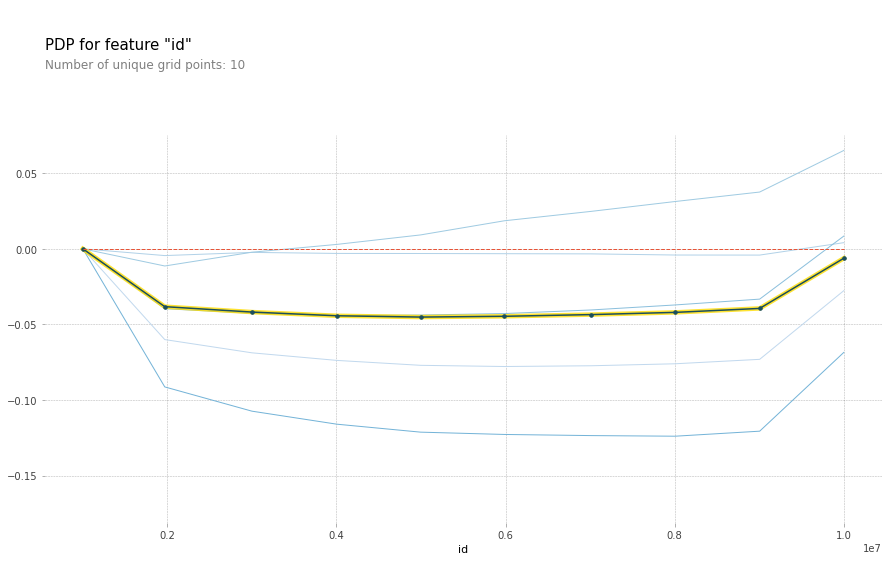

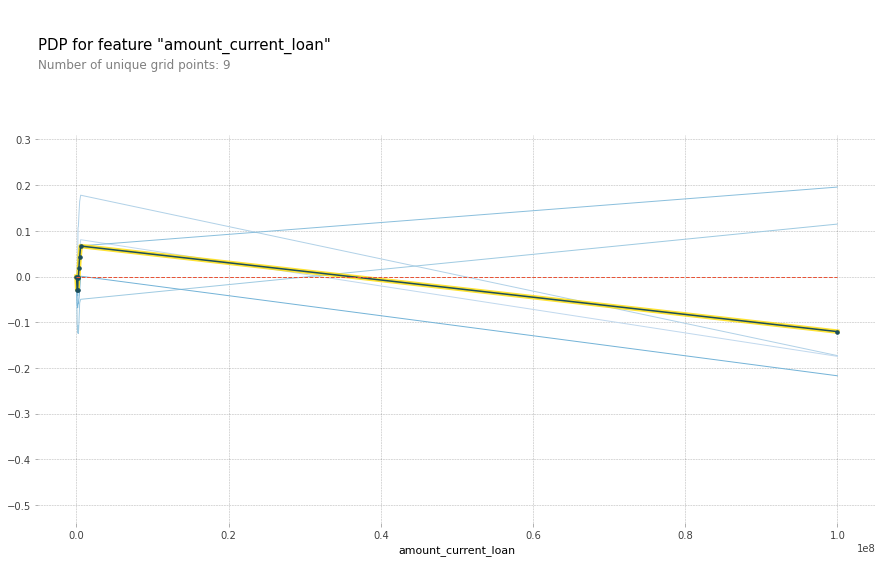

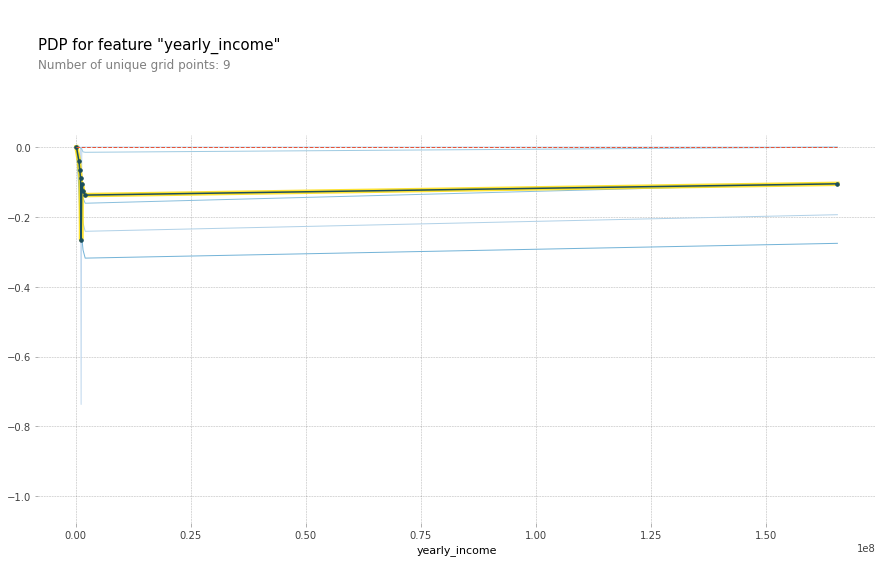

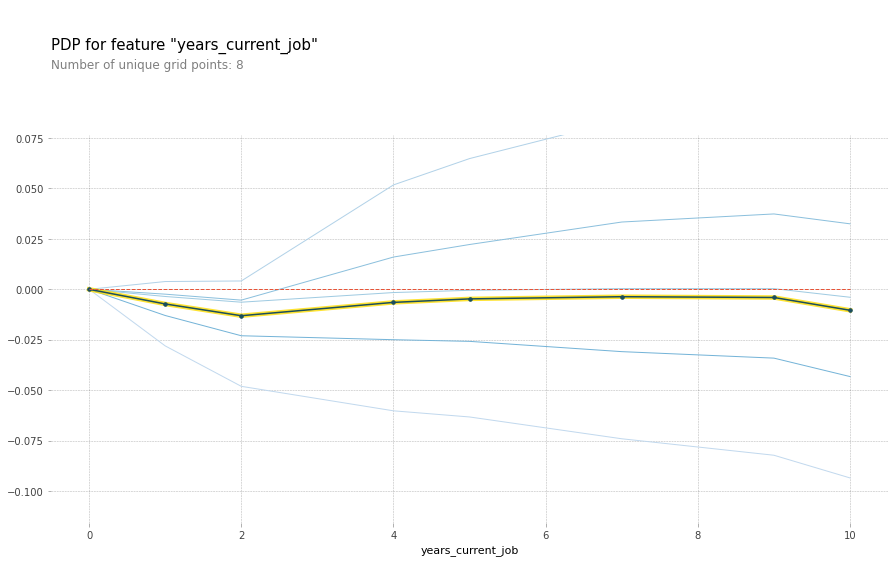

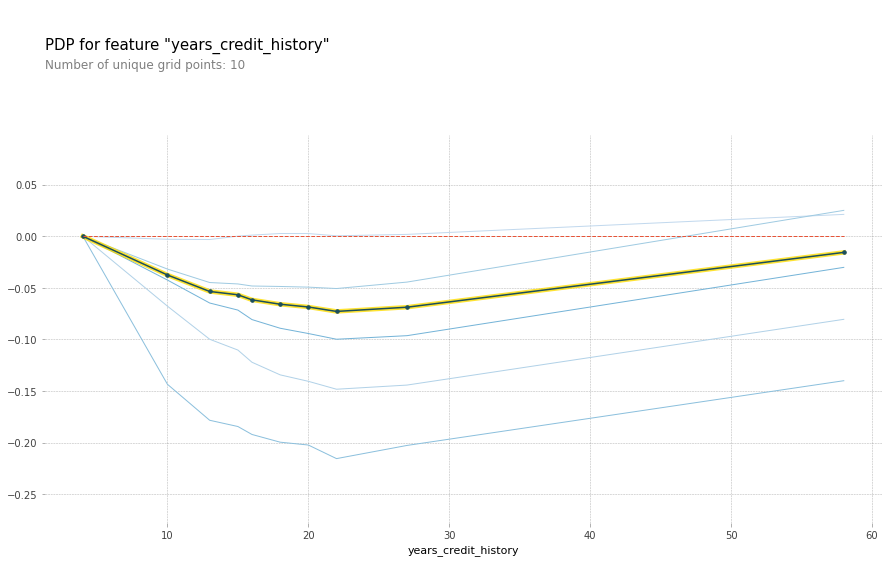

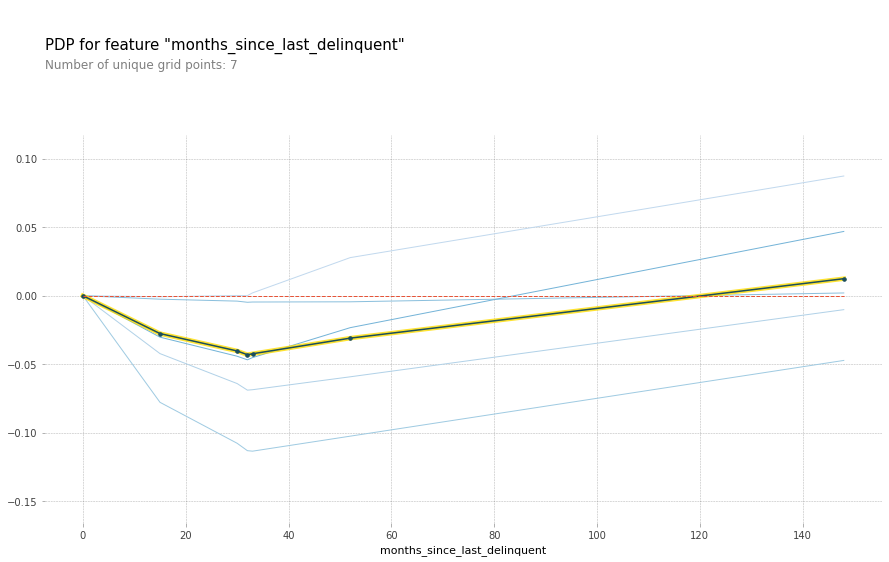

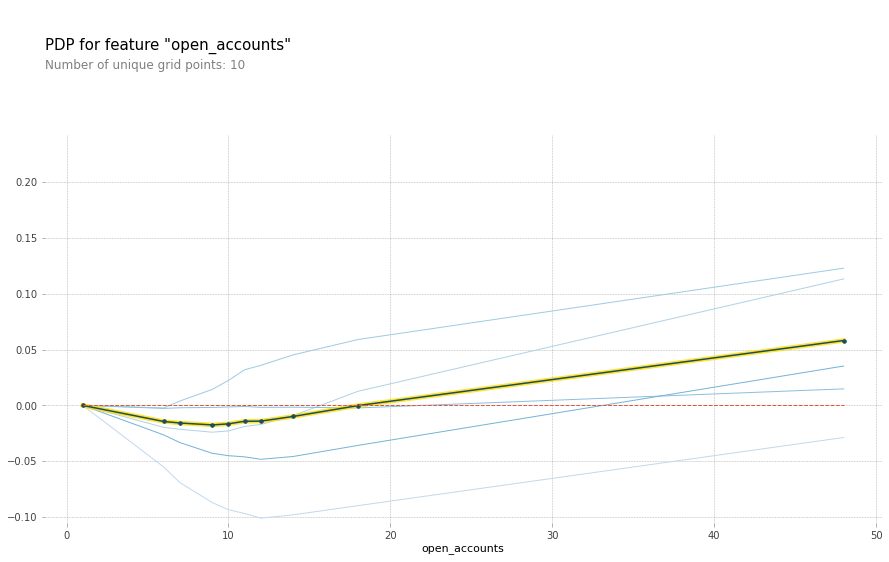

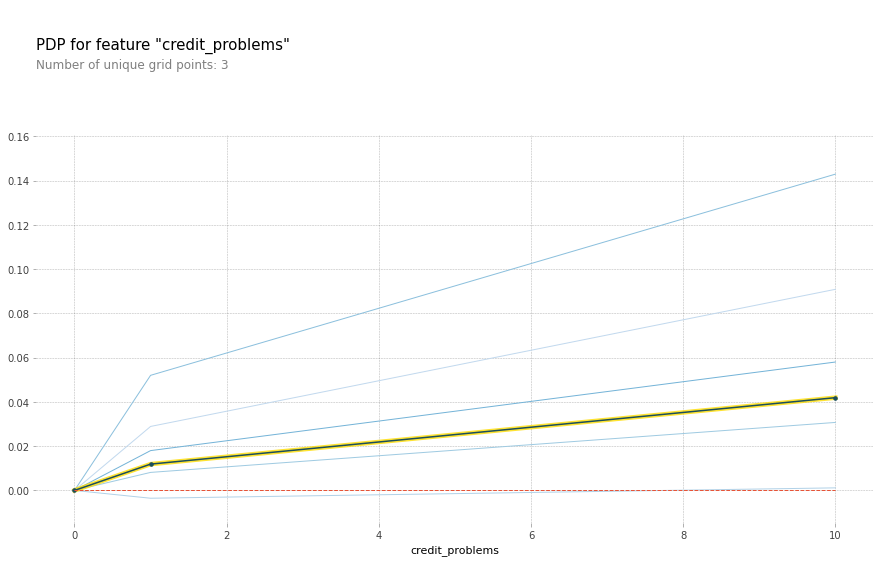

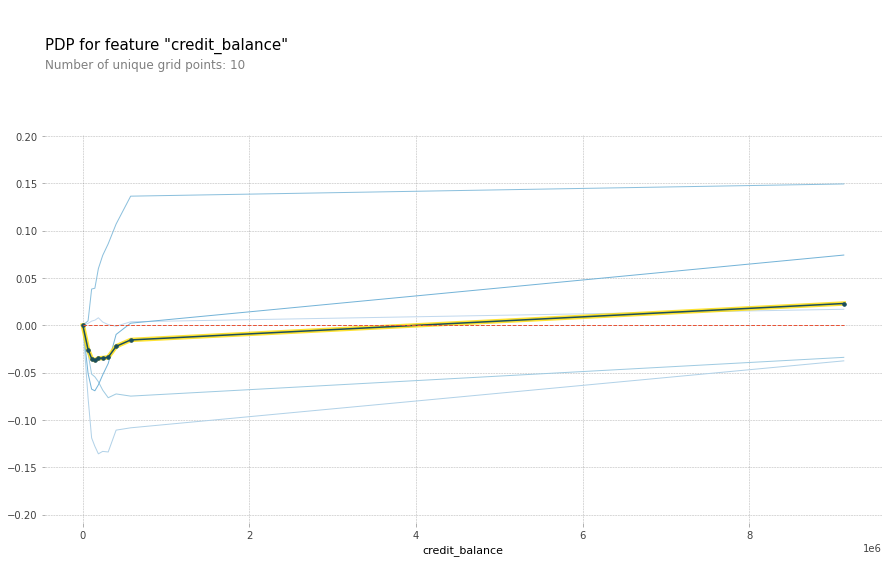

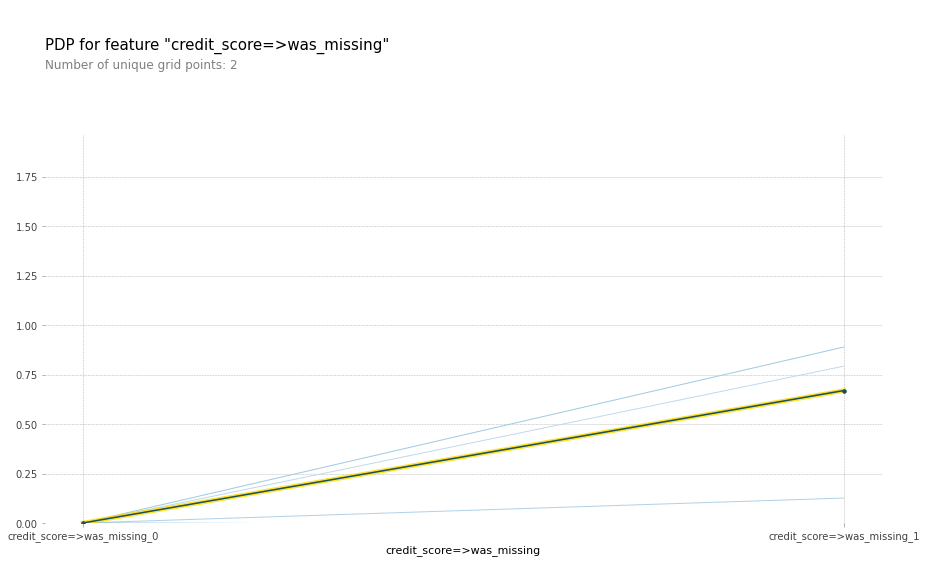

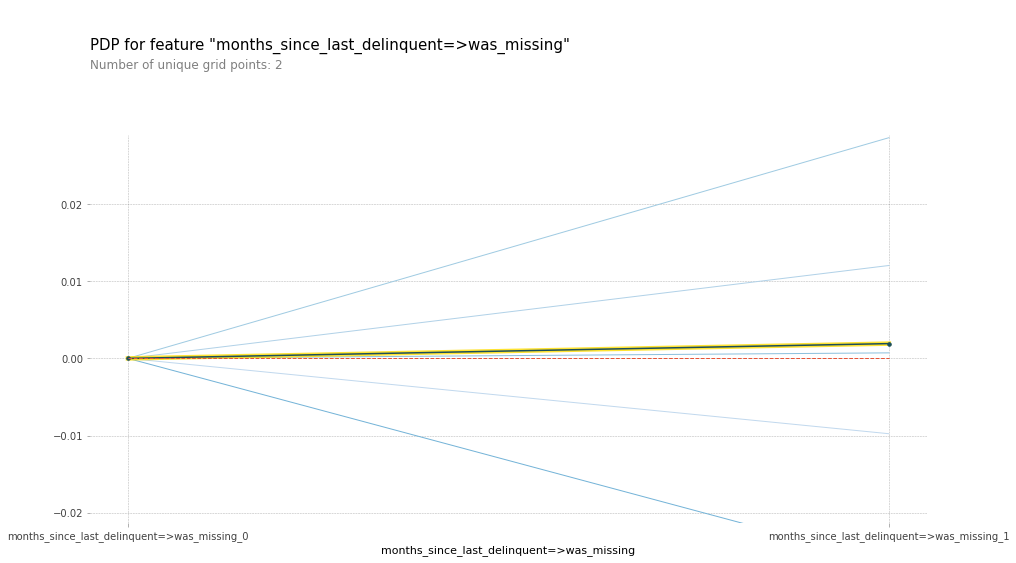

In [11]:
# Actual relationship between independant and dependant features (partial dependance):

pdps(model=m,
          data=train_X.sample(10_000),
          target="y",
          omit=[],
          clusters=5)